# Programa Ejemplo para Realizar Aprendizaje Supervisado utilizando aprendizaje profundo

## Etapa 1: Carga de los datos.

Antes de comenzar a definir la red neuronal, cargamos la base de datos de interés. Para este ejemplo, usaremos la base de datos MNIST, la cual consiste en identificar dígitos escritos a mano alzada https://keras.io/api/datasets/mnist/. Esta base de datos configura un problema de 10 clases, una clase por cada dígito numérico (0-9).

Se cargan las librerías necesarias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model

Se carga la base de datos y se divide en los conjuntos de entrenamiento y prueba. Hay 60000 imágenes para el entrenamiento y 10000 en el conjunto de prueba.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


Las imágenes tienen tamaño de 28x28. A continuación, se muestran algunos ejemplos.


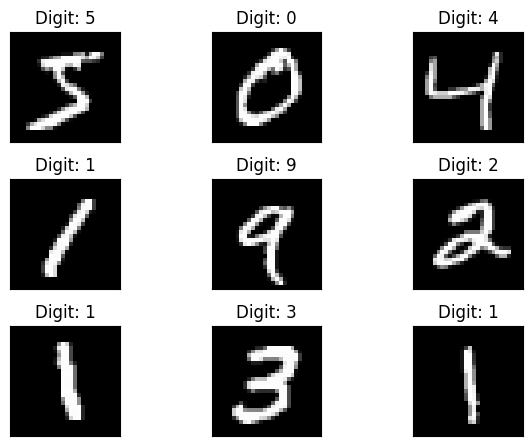

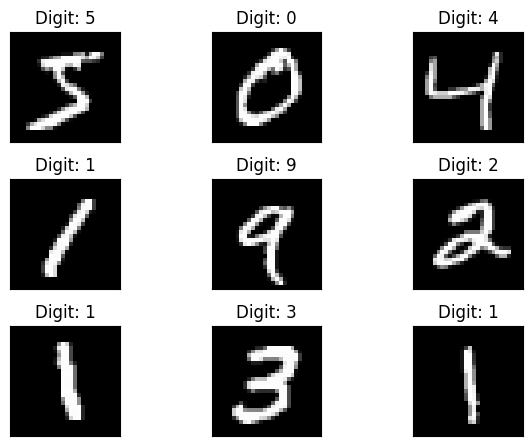

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Dado que este ejercicio es introductorio solo usaremos la forma más básica de una red neuronal, denominada densa. Esta versión no tiene la capacidad de manipular imágenes en su forma original. Así, aplicaremos una etapa de preprocesamiento a cada imagen con el fin de que las imágenes sean compatibles con las entradas de la red.

In [5]:
d1, d2, d3 = x_train.shape
x_train_flat = x_train.reshape((d1, d2*d3))/255
d1, d2, d3 = x_test.shape
x_test_flat = x_test.reshape((d1, d2*d3))/255

La operación llevada a cabo se denomina "aplastamiento" y consiste en convertir un arreglo de dos o más dimensiones en uno de una dimensión. El aplastamiento o flatten consiste en unir las columnas del arreglo (ver https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.w3resource.com%2Fnumpy%2Fmanipulation%2Fndarray-flatten.php&psig=AOvVaw2gj8sBNDTeO-t_T_R15TWv&ust=1675298541750000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPi0xsWL8_wCFQAAAAAdAAAAABAE)

In [6]:
print(x_train_flat.shape)

(60000, 784)


Se mantienen las mismas 60000 imágenes del entrenaminento y se obtienen 784 atributos luego del proceso de aplastamiento. 28*28=784.

## Etapa 2: Definición de la red.

Ahora podemos empezar a construir la red neuronal para resolver el problema de clasificación planteado. Keras tienen dos formas para definir una red neuronal. La API secuencial (https://keras.io/guides/sequential_model/) y la API funcional (https://keras.io/guides/functional_api/). En este ejemplo usaremos las API secuencial.

### 2.1 Definición de la red usando la API secuencial.

Se define una red con tres capas: dos ocultas y una de salida. Para este ejemplo el tipo de capas usada es la "Dense", en unidades posteriores usaremos otro tipo de capas como las convolucionales y las recurrentes.

In [49]:
model = Sequential()
# Se define el tamaño de la entrada en 784, que corresponde con la dimensión de los
# datos. La primera capa tiene 1024 unidades con activación ReLU.
model.add(Dense(1024, input_shape=(784,), activation='relu'))
# La segunda capa presenta 512 unidades con activación ReLU.
model.add(Dense(512, activation='ELU'))
model.add(Dense(256,activation= 'elu'))

# La tercera capa, corresponde a la capa de salida. Como es un problema de clasificación
# de múltiples clases, la capa de salida debe tener tantas unidades como clases.
# Además, debe usarse la activación softmax.
model.add(Dense(10, activation='softmax'))

In [50]:
# Con model.summary() podemos verificar las capas que definimos y la cantidad de
# parámetros en cada capa.
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1024)              803840    
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1462538 (5.58 MB)
Trainable params: 1462538 (5.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


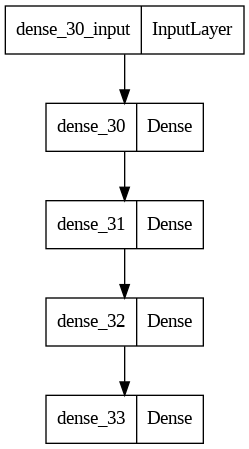

In [51]:
plot_model(model)

In [52]:
# Se compila el modelo. En este punto se define, la función de costo, el optimizador y
# la métrica usada para medir el rendimiento.
# 1. Para el loss se usa el sparse_categorical_crossentropy dado que es un problema de
# clasificación multi-clase.
# 2. Utilizamos el optimizador sgd, el cual es un algoritmo basado en gradiente.
# 3. Finalmente, se usa el accuracy para medir el rendimiento.
optimizer = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [56]:
# Ahora, es momento de entrenar la red neuronal, lo cual corresponde a calcular
# parámetros de la red.
# 1. Se pasan los datos de entrenamiento x_train y y_train.
# 2. El número de épocas, en este caso, obedece a la cantidad de repeticiones
#    del entrenamiento.
# 3. El batch_size, será un parámetro que discutiremos en la siguiente unidad,
#    por ahora lo fijamos para que sea igual a la cantidad de muestras en el
#.   conjunto de entrenamiento.
model.fit(x_train_flat, y_train, epochs=300, batch_size=60000, validation_data= (x_test_flat, y_test))

Epoch 1/300
1/1 [==============================] - 1s 506ms/step - loss: 0.3386 - accuracy: 0.9066 - val_loss: 0.3217 - val_accuracy: 0.9123
Epoch 2/300
1/1 [==============================] - 0s 274ms/step - loss: 0.3384 - accuracy: 0.9066 - val_loss: 0.3215 - val_accuracy: 0.9123
Epoch 3/300
1/1 [==============================] - 0s 222ms/step - loss: 0.3383 - accuracy: 0.9067 - val_loss: 0.3214 - val_accuracy: 0.9122
Epoch 4/300
1/1 [==============================] - 0s 238ms/step - loss: 0.3381 - accuracy: 0.9066 - val_loss: 0.3212 - val_accuracy: 0.9123
Epoch 5/300
1/1 [==============================] - 0s 233ms/step - loss: 0.3379 - accuracy: 0.9067 - val_loss: 0.3211 - val_accuracy: 0.9123
Epoch 6/300
1/1 [==============================] - 0s 222ms/step - loss: 0.3378 - accuracy: 0.9067 - val_loss: 0.3209 - val_accuracy: 0.9123
Epoch 7/300
1/1 [==============================] - 0s 256ms/step - loss: 0.3376 - accuracy: 0.9068 - val_loss: 0.3208 - val_accuracy: 0.9124
Epoch 8/300
1

In [57]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.9201
test_acc: 0.9200999736785889
